In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Datafiles\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**Standardization**

- Standardization means scaling the data into one scale

- We have different columns has different units so that the value will vary

- One column has very huge values

- Another column has very less values

- So it is important to scale all type of units under one scale

- We have 2 procedures

- Standrdization

    - Z-score:
        
        <img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="24" data-atf="0">
        
        - the values ranges from -3 to 3

- Normalization

    - Min max scalar
    
<img style="height:109px;margin-left:-102px;margin-top:25px;width:459px" alt="Min–max normalization - Hands-On Machine Learning on Google ..." id="dimg_1" src="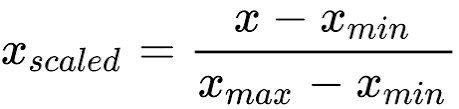" data-csiid="1" data-atf="1">


- Values ranges from  0 to 1

In [ ]:
# step-1:Take the prevalaing wage column
# Z-score = x-mean/sigma 

# Step-2:  Calculate mean of prevailing wage
# step-3: Calculate std of prewage
# Step-4: Nr:  Pwage-mean
# Step-5: pwage_zscore=Nr/Dr

In [3]:
pwage=visa_df['prevailing_wage']
pwage_mean=visa_df['prevailing_wage'].mean()
pwage_std=visa_df['prevailing_wage'].std()
Nr=pwage-pwage_mean
visa_df['prevailing_wage_z']=Nr/pwage_std

In [5]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [7]:
visa_df['prevailing_wage'].max(),visa_df['prevailing_wage_z'].max()
# 99.7% data between -3 to 3

(319210.27, 4.634101837909902)

In [8]:
visa_df['prevailing_wage'].idxmax()
# In the prevailing_wage column the maximum value id is 21077

21077

In [9]:
visa_df['prevailing_wage_z'].idxmax()

21077

In [10]:
visa_df['prevailing_wage'].min(),visa_df['prevailing_wage_z'].min()

(2.1367, -1.4096818992891214)

In [11]:
visa_df['prevailing_wage'].idxmin()

20575

In [14]:
# 21077 is max value id
# 20575 is min value id
# can you get only these two rows values
visa_df.iloc[[21077,20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634102
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409682


In [17]:
cols=['prevailing_wage','prevailing_wage_z']
ids=[2107,20575]
visa_df[['prevailing_wage','prevailing_wage_z']].iloc[[2107,20575]]
visa_df[cols].iloc[ids]

,prevailing_wage,prevailing_wage_z
2107,56741.4400,-0.335398
20575,2.1367,-1.409682


In [ ]:
# Generally will overwrite the column values
# because we want to clean our data before we apply ML model
# If you create any extra columns make sure drop some of non required columns

$StandardScalar$

In [22]:
# read the package
# save the pcakage
# apply fit trans
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [23]:
cols=['prevailing_wage','prevailing_wage_z','prevailing_wage_ss']
visa_df[cols]

,prevailing_wage,prevailing_wage_z,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


**Normalization**

$min$$max$$scalar$

In [24]:
# Read the data agian
path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Datafiles\Visadataset.csv"
visa_df=pd.read_csv(path)

In [26]:
# x-x_min/(x_max-x_min)

# step-1: Read the pawge column
# step-2: Find the min value of the pwage column
# step-2: Find the max value of the pwage column
# Step-3: nr= datacolumn-min value
# Step-4: dr= max_value-min_value
# Step-5: nr/dr
pwage=visa_df['prevailing_wage']
pwage_min=visa_df['prevailing_wage'].min()
pwage_max=visa_df['prevailing_wage'].max()
nr=pwage-pwage_min
dr=pwage_max-pwage_min
visa_df['prevailing_wage_norm']=nr/dr

In [28]:
visa_df['prevailing_wage_norm'].min(),visa_df['prevailing_wage_norm'].max()

(0.0, 1.0)

$MinMaxScalar$

In [30]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
visa_df['prevailing_wage_mms']=mms.fit_transform(visa_df[['prevailing_wage']])